In [85]:
!gdown --id 1rovazK48q7pHcEM271aX70Dr594NYQ77
!gdown --id 1ZCHuj6JtyOkb5ismn3qF3Rp2DRGJ1tRk

Downloading...
From: https://drive.google.com/uc?id=1rovazK48q7pHcEM271aX70Dr594NYQ77
To: /content/train.csv
100% 20.1M/20.1M [00:00<00:00, 67.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ZCHuj6JtyOkb5ismn3qF3Rp2DRGJ1tRk
To: /content/test.csv
100% 2.03M/2.03M [00:00<00:00, 12.0MB/s]


In [86]:
import gensim
import pandas as pd

In [87]:
test = pd.read_csv('/content/test.csv')

In [88]:
df = pd.read_csv('/content/train.csv')

In [89]:
l = [i for i in df['article']]

review = df['article'].apply(gensim.utils.simple_preprocess)


In [90]:
# model of words

model_one = gensim.models.Word2Vec(window = 10,min_count=4, size=300,  workers = 4,sg=1 )

In [91]:
model_one.build_vocab(review, progress_per=1000)

In [92]:
model_one.train(review, total_examples=model_one.corpus_count,
                epochs=model_one.epochs)

(8606222, 10642225)

In [93]:
model_one.save('./word_model')

In [94]:
model_one.wv.similarity('استاندارد','مردم')

0.07653782

In [95]:
from gensim.models.doc2vec import TaggedDocument

tag = df['id']
art = review

docs = []

for i in range(len(tag)):
  docs.append(TaggedDocument(words=review[i], tags= tag[i]))

print(docs[0])
print(docs[0][0])
print(docs[0][1])

TaggedDocument(['آيا', 'مشكل', 'اصلي', 'سينماي', 'ايران', 'فيلمنامه', 'است', 'اين', 'هفته', 'با', 'ميهن', 'بهرامي', 'ميهن', 'بهرامي', 'داراي', 'تحصيلات', 'تا', 'مقطع', 'دكتري', 'در', 'رشته', 'هاي', 'روان', 'شناسي', 'جامعه', 'شناسي', 'فلسفه', 'مجسمه', 'سازي', 'خوشنويسي', 'است', 'او', 'طي', 'سالها', 'در', 'كنار', 'پرداختن', 'به', 'مطالعه', 'تحقيق', 'در', 'رشته', 'هاي', 'تخصصي', 'اش', 'در', 'عرصه', 'نگارش', 'فيلمنامه', 'مقاله', 'كتاب', 'همچنين', 'نقد', 'بررسي', 'فيلم', 'هاي', 'سينمايي', 'فعاليتهاي', 'گسترده', 'اي', 'داشته', 'است', 'خانم', 'بهرامي', 'لطفا', 'بفرماييد', 'كه', 'به', 'نظر', 'شما', 'مشكل', 'اصلي', 'سينماي', 'ايران', 'چيست', 'آيا', 'شما', 'با', 'آن', 'عده', 'اي', 'كه', 'اين', 'مشكل', 'را', 'ناشي', 'از', 'فيلمنامه', 'مي', 'دانند', 'موافقيد', 'مشكل', 'سينماي', 'ايران', 'مشكلي', 'است', 'در', 'حد', 'يك', 'مساله', 'اجتماعي', 'مساله', 'اي', 'است', 'كه', 'مثل', 'يك', 'رشته', 'مسيرهاي', 'انحرافي', 'فصلي', 'جريان', 'ساخت', 'فيلم', 'را', 'به', 'خودش', 'مي', 'كشد', 'اين', 'مشكلي', 'نيست',

In [96]:
from gensim.models.doc2vec import Doc2Vec

#model of docs

model_two = Doc2Vec(docs, vector_size = 300, window=10, min_count=4, workers=4)

In [97]:
model_two.save('./doc_model')

In [98]:
model_two.train(docs, total_examples=model_two.corpus_count,
                epochs=model_two.epochs)

  Q_2

In [99]:
l_test = [i for i in test['article']]

review_test = test['article'].apply(gensim.utils.simple_preprocess)

In [100]:
# making relevant dics

dic_word = {}
dic_article = {}
word_and_doc = {}

N = len(test['id'])

for i in range(N):
  dic_article[test['id'][i]] = {}

  for word in review_test[i]:
    if not word in dic_article[test['id'][i]]:
      dic_article[test['id'][i]][word] = review_test[i].count(word)


for i in range(N):
  for word in review_test[i]:

    if not word in dic_word:
      dic_word[word] = 0


    if not (test['id'][i], word) in word_and_doc:
      word_and_doc[(test['id'][i], word)] = 1
      dic_word[word]+= 1




In [101]:
import math
def get_tf_idf(word, doc_id):

  tf = 1 + math.log(dic_article[doc_id][word], 10)

  N = len(test['id'])
  df = dic_word[word]
  idf = math.log((N/df), 2)

  return tf * idf

In [102]:

def vec_tf_idf(id):
  weight_sum = 0
  vec_sum = 0


  for word in dic_article[id]:
    
    try:
      vector = model_one.wv[word]
    except:
      continue
      
    count = dic_article[id][word]
    tf_idf = get_tf_idf(word, id)
    

    weight_sum += count * tf_idf
    vec_sum += count * tf_idf * vector
  
  return vec_sum/weight_sum




In [103]:
tagged_dic_test = {}
for i in range(len(test['id'])):
  tagged_dic_test[test['id'][i]] = review_test[i]



def vec_doc2vec(id):
  return model_two.infer_vector(tagged_dic_test[id])


In [104]:
v = vec_doc2vec('Doc443')
vv = vec_tf_idf('Doc443')


In [105]:
import sklearn



Q_3

In [106]:
from numpy import dot
from numpy.linalg import norm


def most_similar_tfidf(id):

  vector = vec_tf_idf(id)

  max_id = None
  max_sim = 0

  for tag in test['id']:
    if not tag == id:
      cos_sim = dot(vector, vec_tf_idf(tag))/(norm(vector)*norm(vec_tf_idf(tag)))
    if cos_sim > max_sim:
      max_sim = cos_sim
      max_id = tag
  
  return (max_sim, max_id,'A')
  

In [107]:
def most_similar_doc2vec(id):

  vector = vec_doc2vec(id)

  max_id = None
  max_sim = 0

  for tag in test['id']:
    if not tag == id:
      cos_sim = dot(vector, vec_doc2vec(tag))/(norm(vector)*norm(vec_doc2vec(tag)))
    if cos_sim > max_sim:
      max_sim = cos_sim
      max_id = tag
  
  return (max_sim, max_id,'B')

In [108]:
to_find_sim_to = ['Doc443','Doc428','Doc635']

for tag in to_find_sim_to:
    print(tag,': ',most_similar_tfidf(tag),' , ',most_similar_doc2vec(tag))

Doc443 :  (0.98966557, 'Doc635', 'A')  ,  (0.84431106, 'Doc635', 'B')
Doc428 :  (0.9754153, 'Doc554', 'A')  ,  (0.82955956, 'Doc311', 'B')
Doc635 :  (0.98966557, 'Doc443', 'A')  ,  (0.82800233, 'Doc196', 'B')


Q_4

In [109]:
word_sim = ['بهداشت','استقلال','رودخانه']

for word in word_sim:
  sims = model_one.wv.most_similar(word, topn=3)
  print(word,': ',sims)


بهداشت :  [('بهداشتي', 0.7424497604370117), ('بهورزان', 0.7100278735160828), ('مراقبتهاي', 0.6938295364379883)]
استقلال :  [('ارضي', 0.5578886270523071), ('الوحده', 0.5539909601211548), ('قهرمانيش', 0.5532798767089844)]
رودخانه :  [('درياچه', 0.789567768573761), ('رودهاي', 0.7618081569671631), ('دز', 0.7617416977882385)]


Q_5

In [110]:
import matplotlib
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE 

In [111]:
tsne = TSNE(perplexity=10, n_components=2, init='pca', n_iter=3500, random_state=32)

to_plot_words = []

for word in word_sim:
  to_plot_words.append(model_one.wv[word])
  sims = model_one.wv.most_similar(word, topn=10)
  for i in sims:
    to_plot_words.append(model_one.wv[i[0]])

X_Y = tsne.fit_transform(to_plot_words)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


<function matplotlib.pyplot.show>

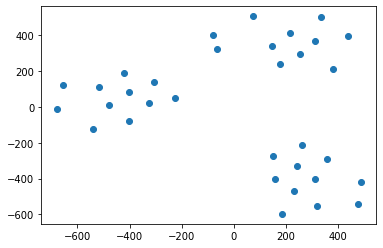

In [112]:

X = [i[0] for i in X_Y]
Y = [i[1] for i in X_Y]
plt.scatter(X,Y)
plt.show


تحلیل:

نزدیک‌ترین کلمات به یک کلمه، طبیعتا فاصله نزدیکی از هم دارند و همان طور که در نمودار معلوم است نقاط به ۳ دسته مجزا تقسیم شده ا‌ند (که البته دور بودن فاصلهٔ کلمات سوال را هم نشان میدهد)